`Python pandas provides some handy functions that can help accelerate time series analysis and modeling cycle. Following are the functions`

- Rolling Window 
- Resample
- Exponential Moving Average
- Shift
- Diff
- tshift

In [1]:
!pip install requests

In [2]:
import datetime
import requests

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1, 1)
end = datetime.date(2020, 7, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [4]:
pd.read_json(result.content).head(10)

,bpi,disclaimer,time
2017-01-01,997.6888,This data was produced from the CoinDesk Bitco...,NaN
2017-01-02,1018.0500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-03,1030.8175,This data was produced from the CoinDesk Bitco...,NaN
2017-01-04,1129.8700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-05,1005.8150,This data was produced from the CoinDesk Bitco...,NaN
2017-01-06,895.6700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-07,905.1700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-08,913.5238,This data was produced from the CoinDesk Bitco...,NaN
2017-01-09,899.3500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-10,904.7925,This data was produced from the CoinDesk Bitco...,NaN


In [5]:
 #
data = pd.read_json(result.content).iloc[:-2, :1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

## Note: data is at daily level

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


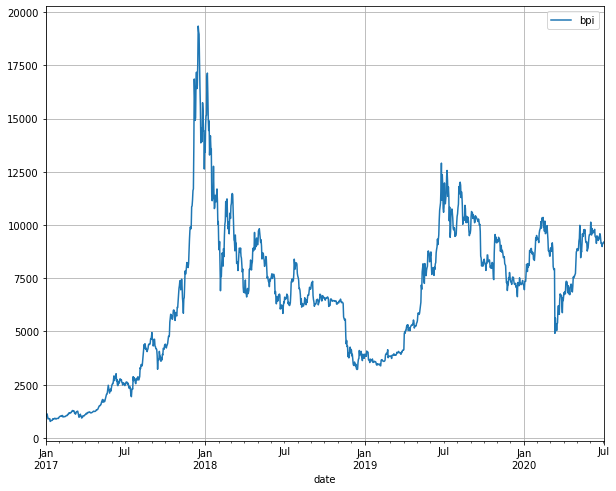

In [6]:
## Plot
data.plot(grid=True);




### Resample
`resample()` <br>
`D` - Calendar Day
`B` - Business Day
`W` - Weekly
`M` - Monthly
`Q` - Quarterly
`A` - Year end
`H` - Hours
`T` - Minutes
`S` - Seconds

                     bpi
date                    
2017-03-31   1034.169242
2017-06-30   1919.658520
2017-09-30   3506.611449
2017-12-31   9413.347972
2018-03-31  10468.423818
2018-06-30   7747.165877
2018-09-30   6798.307918
2018-12-31   5169.904503
2019-03-31   3781.639959
2019-06-30   7295.205002
2019-09-30  10369.583753
2019-12-31   7994.267917
2020-03-31   8273.003262
2020-06-30   8649.343719
2020-09-30   9176.912500


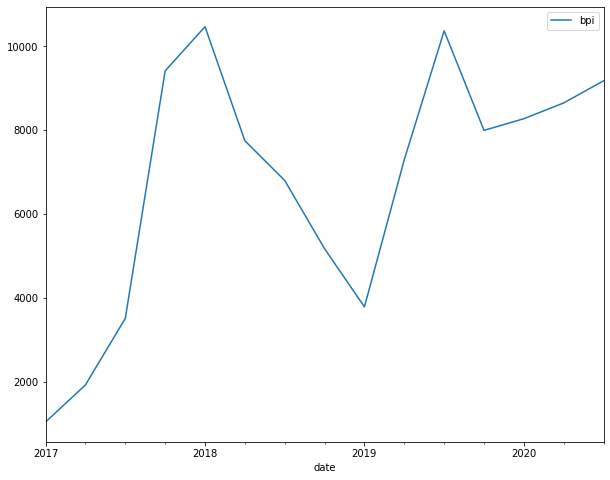

In [7]:
##
print(data.resample('Q').mean())

## plot
display(data.resample('Q').mean().plot())

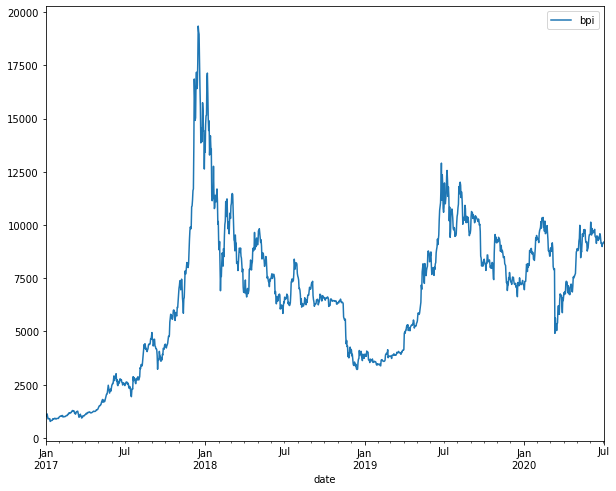

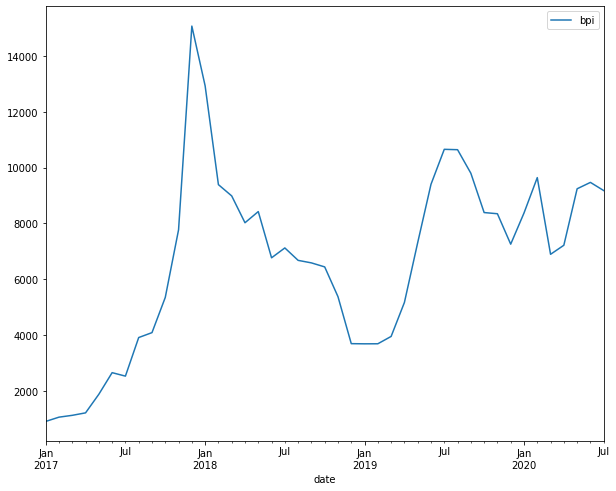

In [8]:
## Plot all data and monthly data separately
data.plot()
data.resample('M').mean().plot()

In [9]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


`diff()`

Take the difference between data 

In [10]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [11]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


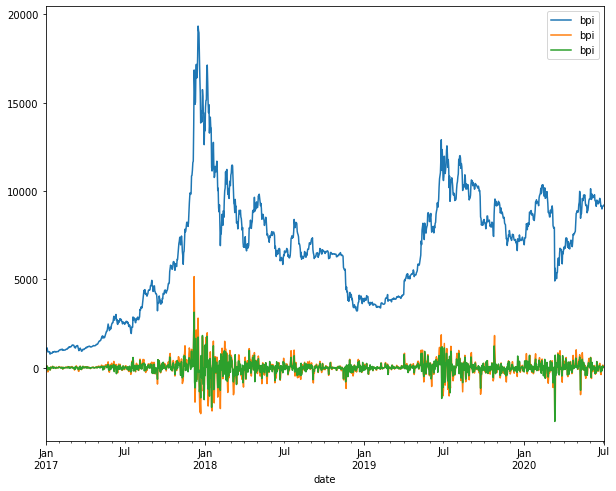

In [12]:
## Let's visualize it
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()],axis=1).plot() 

In [13]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


`shift()`

- data value is shifted by 1 in default

In [14]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


`tshift()`

- date is shifted using tshift()

In [15]:
data[:5].tshift(2) ## shifting date by 2

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [16]:
## data at t - data at (t-1)
data[:5] - data[:5].shift() 

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [17]:
## data at t - data at (t-2)
data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


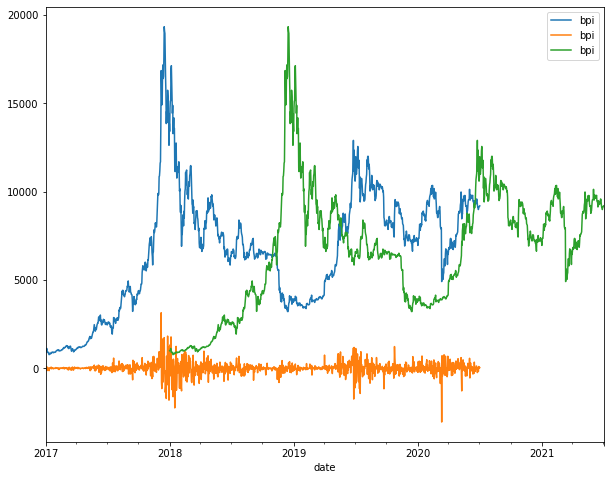

In [18]:
## Let's visualize the data
pd.concat([data, data-data.shift(), data.tshift(365)],axis=1).plot()

`rolling window`

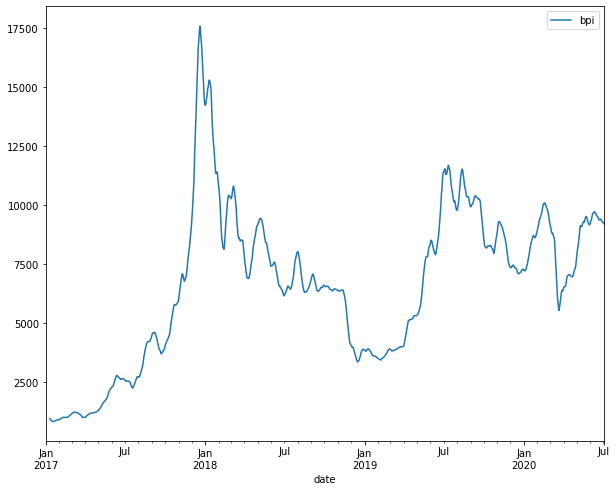

In [19]:
## will take average of last time like t-1, t-2, ...., t-10
data.rolling(window=10).mean().plot()

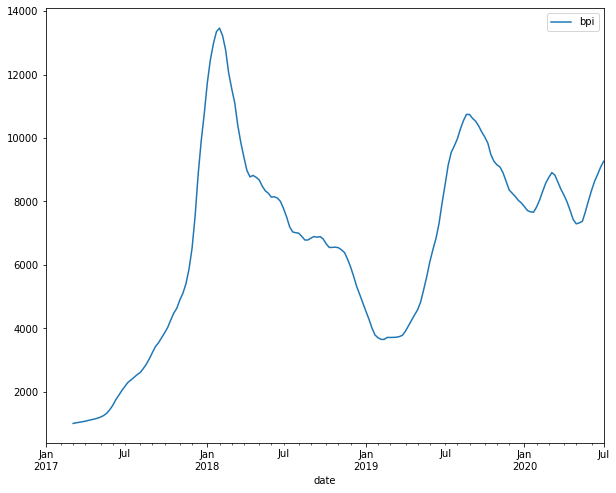

In [20]:
## resampling data at week level
data.resample('W').mean().rolling(window=10).mean().plot()

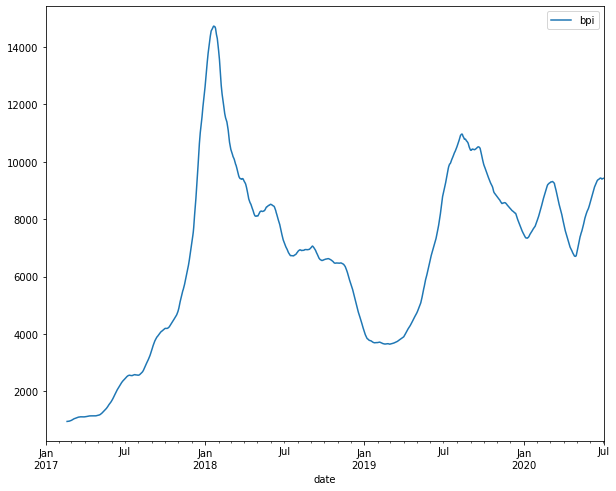

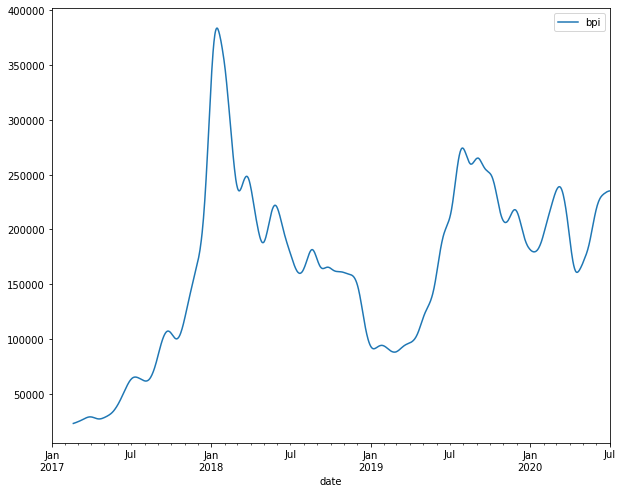

In [21]:

data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()

`exponential weighted moving average`

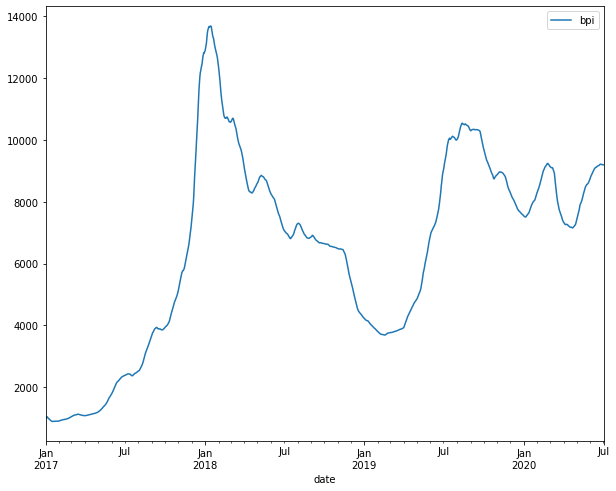

In [22]:
data.ewm(span=50).mean().plot()

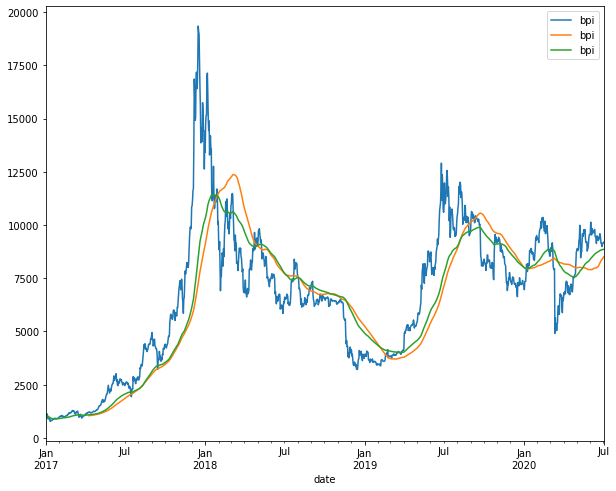

In [23]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()], axis=1).plot()


In [24]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


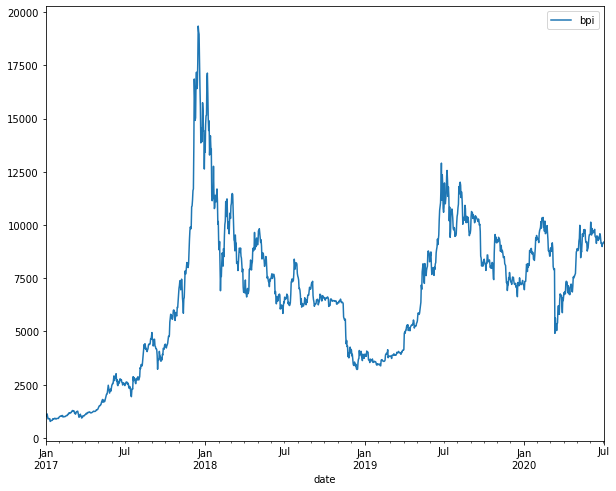

In [25]:
data.plot()

`groupby()`

In [26]:
## data by week
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,6612.779266
1,6612.821919
2,6615.719704
3,6595.242466
4,6621.517746
5,6636.877807
6,6588.415989


In [27]:
## data by month
data.groupby(data.index.month).mean()

,bpi
date,
1,6474.960095
2,5979.032653
3,5241.117152
4,5408.169478
5,6715.698325
6,7074.233533
7,6820.423568
8,7077.441969
9,6825.175222


In [28]:
## data by year
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,8468.953262


In [29]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [30]:
data[:5].cumsum() ## Cummulative sum

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [31]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


`pctchange()` -- Percentage change

In [32]:
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


`expanding()` -- 

In [33]:
data[:5].expanding().sum() ## similar cummulative sum

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [34]:
data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260


**References**:
1. (AI Engineering) Python Functions for Time Series Modeling and Analysis (YouTube Link: https://www.youtube.com/watch?v=rBkqkpl21v8&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=6)

2. (AI Engineering) Python Time Series Functions Part2 (YouTube Link: https://www.youtube.com/watch?v=2bNeV-6-tWE&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=7)